<a href="https://colab.research.google.com/github/1109Honey1204/honeys-mvc-site/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tidyverse")
install.packages("nycflights13")
library(tidyverse)
library(nycflights13)
options(repr.plot.width=5, repr.plot.height=4)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# STATS 306
## Homework 3:  Advanced `dplyr` and tidy data

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE".

## Problem 1: Why so delayed? (4 points)
The following code adds a variable `week` to `flights`, such that `week==1` for the first seven days of the year, `week==2` for days 8-14, etc. (In the second half of the semester we will learn how to work with times and date data using the `lubridate` package.)

In [ ]:
flights_week = mutate(flights, week=lubridate::week(time_hour))

**(a)** Make a bar plot of the proportion of flights each week whose actual departure time is NOT missing. The x-axis of your plot should contain the weeks of the year, ranging from 1 to 52, and the y-axis of your plot should be a number between 0 and 1 showing the decimal proportion of flights that have a departure time. What sort of plot geometry (line, bar, point, histogram, etc.) do you think is appropriate for this kind of plot? Does anything about this plot jump out at you? What and why? *1 point*

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



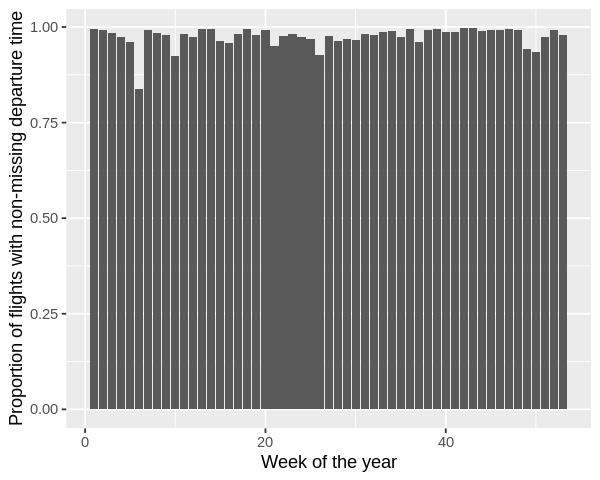

In [ ]:
# Your solution here
install.packages("dplyr")
library(dplyr)
library(ggplot2)
flights_week <- flights %>% 
                mutate(week=lubridate::week(time_hour))
week_prop <- flights_week %>% 
                group_by(week) %>% 
                summarize(prop_non_miss_dep_time = sum(!is.na(dep_time))/n())
ggplot(week_prop, aes(x=week, y=prop_non_miss_dep_time)) + 
  geom_bar(stat="identity") + 
  xlab("Week of the year") + 
  ylab("Proportion of flights with non-missing departure time")




**(b)** For the week with the highest fraction of missing departure times, generate a table which shows the proportion of missing departure times for each day of that week. Your table should have columns `year`, `month`, `day`, and `prop_miss_dep_time`. Sort your table in chronological order and store it in a variable called `table1b`. *1 point*

In [ ]:
# Your solution here
table1b<- flights_week %>%
  filter(week==6)%>%
  group_by(year,month,day)%>%
  mutate(new_col=as.integer(is.na(dep_time)))%>%
  summarise(prop_miss_dep_time= mean(new_col))
print(table1b)

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


# A tibble: 7 × 4
# Groups:   year, month [1]
   year month   day prop_miss_dep_time
  <int> <int> <int>              <dbl>
1  2013     2     5            0.0179 
2  2013     2     6            0.00888
3  2013     2     7            0.00429
4  2013     2     8            0.508  
5  2013     2     9            0.575  
6  2013     2    10            0.0314 
7  2013     2    11            0.0786 


**(c)** 2 days in `table1b` should jump out at you. What you're discovering from the data is the [North American Blizzard of 2013](https://en.wikipedia.org/wiki/February_2013_North_American_blizzard). Many flights were cancelled due to extreme weather conditions. Identify the proportion of cancelled flights out of LaGuardia Airport (LGA) during the days that jumped out at you for each airline carrier in descending order. *1 point*

In [ ]:
# Your solution here
flights_week %>% 
  filter(origin == "LGA", month ==2, (day == 8 | day ==9 ))%>%
  mutate(new_proportion = as.integer(is.na(dep_time)))%>%
  group_by(carrier) %>% 
  summarize(prop_miss_dep_time=mean(new_proportion)) %>% 
  arrange(desc(prop_miss_dep_time))


carrier,prop_miss_dep_time
<chr>,<dbl>
YV,1.0000000
9E,0.6666667
DL,0.6120690
MQ,0.6000000
UA,0.5625000
US,0.5593220
FL,0.5238095
B6,0.5000000
EV,0.5000000


**(d)** In your own words, summarize your findings from the previous exercises. Most importantly, comment on which airlines were the most and least cautious in terms of flight cancellations. Can you think of any reason why this might be? *1 point*

It's a common thing for the flight to get delayed or canceled. However, there are certain airlines are more responsive than others. Based on the previoud exercise, I think YV is the most cautious and the AA is the least cautious in terms of flight cancellations. I think it may be related to the number of planes the airline has and the areas to planes often fly to. 

## Problem 2: Graduate school admissions (4 points)
This problem studies a built-in dataset called `UCBAdmissions`. It contains graduate school admissions data from 1973 for six departments at UC Berkeley:

In [ ]:
data(UCBAdmissions)
ucb <- as_tibble(UCBAdmissions) %>% print
view(ucb)


# A tibble: 24 × 4
   Admit    Gender Dept      n
   <chr>    <chr>  <chr> <dbl>
 1 Admitted Male   A       512
 2 Rejected Male   A       313
 3 Admitted Female A        89
 4 Rejected Female A        19
 5 Admitted Male   B       353
 6 Rejected Male   B       207
 7 Admitted Female B        17
 8 Rejected Female B         8
 9 Admitted Male   C       120
10 Rejected Male   C       205
# … with 14 more rows


(For privacy reasons the names of the departments have been changed to `A`, `B`, ... , `F`.)

**(a)**
Using the tool we learned for summarizing and manipulating tidy data, create a summary table from `ucb` which shows the acceptance rate by gender. Your table should have 5 columns: `Department`, `Gender`, `Admitted`, `Rejected`, and `Proportion Admitted`. Store it in a variable called `table3a`. *1 point*

<table>
<thead><tr><th scope="col">Department</th><th scope="col">Gender</th><th scope="col">Admitted</th><th scope="col">Rejected</th><th scope="col">Proportion_Admitted</th></tr></thead>
<tbody>
	<tr><td>A</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
	<tr><td>A</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
		<tr><td>B</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
			<tr><td>B</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
				<tr><td>C</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
					<tr><td>C</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
						<tr><td>D</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
							<tr><td>D</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
								<tr><td>E</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr> 	<tr><td>E</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr> 	<tr><td>F</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr> 	<tr><td>F</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
</tbody>
</table>

(A few entries have been provided for you; your job is to write code that will produce the complete table with no blanks.)

In [ ]:
# Your solution here
ucb_new<- ucb%>%
  pivot_wider(names_from =Admit, values_from=n)
print(ucb_new)
table3a<-data.frame(Department=ucb_new$Dept,Gender=ucb_new$Gender,Admitted=ucb_new$Admitted, Rejected=ucb_new$Rejected)
table3a$Proportion_Admitted<- table3a$Admitted/(table3a$Admitted+table3a$Rejected)
print(table3a)

# A tibble: 12 × 4
   Gender Dept  Admitted Rejected
   <chr>  <chr>    <dbl>    <dbl>
 1 Male   A          512      313
 2 Female A           89       19
 3 Male   B          353      207
 4 Female B           17        8
 5 Male   C          120      205
 6 Female C          202      391
 7 Male   D          138      279
 8 Female D          131      244
 9 Male   E           53      138
10 Female E           94      299
11 Male   F           22      351
12 Female F           24      317
   Department Gender Admitted Rejected Proportion_Admitted
1           A   Male      512      313          0.62060606
2           A Female       89       19          0.82407407
3           B   Male      353      207          0.63035714
4           B Female       17        8          0.68000000
5           C   Male      120      205          0.36923077
6           C Female      202      391          0.34064081
7           D   Male      138      279          0.33093525
8           D Female      131    

**(b)**
In STATS 250 you [learned](https://www.youtube.com/watch?v=6gfMhsWmnwk) how to test for differences in proportions between two populations. Apply this to part (a) `table3a`. Was the overall proportion of men admitted statistically different from that of women? Perform an appropriate test and interpret your findings. What do these result suggest about admissions practices at UC Berkeley in the early 1970s? *1 point*

(Hint: use the `prop.test()` function.)

In [ ]:
# You solution here
table3a %>%
 group_by(Gender) %>%
 summarize(
 admitted = sum(Admitted),
 total = sum(Admitted+Rejected)
 )
prop.test(x =c(female.admitted, male.admitted), n = c(sum(female), sum(male)))
#These results suggest that there were differences in admissions practices at UC Berkeley in the early 1970s, with men having a higher proportion of admissions than women. 
#However, we should be careful in interpreting these results as it is not clear if these differences are due to bias or discrimination
#or if there are other factors that explain the difference in admission rates, such as differences in qualifications or application numbers.

Gender,admitted,total
<chr>,<dbl>,<dbl>
Female,557,1835
Male,1198,2691


ERROR: ignored

**(c)**
Reproduce the table from Problem 1, but now stratify by department. 
Compute the male and female acceptance proportion for each department separately. *1 point*

Your resulting table should look like:


<table>
<thead><tr><th scope="col">Dept</th><th scope="col">Female_Admitted</th><th scope="col">Female_Rejected</th><th scope="col">Male_Admitted</th><th scope="col">Male_Rejected</th><th scope="col">Male_Proportion_Admitted</th><th scope="col">Female_Proportion_Admitted</th></tr></thead>
<tbody>
	<tr><td>A         </td><td> 89      </td><td> &dash;       </td><td>&dash;       </td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>B         </td><td> &dash;       </td><td>  &dash;       </td><td>353</td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>C         </td><td> &dash;       </td><td>  391	     </td><td>&dash;</td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>D         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>&dash;       </td><td>0.33093525	</td><td>&dash;</td></tr>
	<tr><td>E         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>138       </td><td>&dash;</td><td>&dash;</td></tr>
 	<tr><td>F         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>&dash;       </td><td>&dash;</td><td>0.07038123</td></tr>

</tbody>
</table>

(Again, a few table entries have been provided to help you check your work, and it is your job to provide code that computes the entire table automatically.)

In [ ]:
# Your solution here

table3b <- table3a %>%
 group_by(table3a$Proportion_Admitted) %>%
 summarize(
 admitted = sum(Admitted),
 total = sum(Admitted+Rejected)
 )

**(d)**
Do the department-level findings in part (c) agree or disagree with what you concluded in part (b)? Which departments agree with your conclusion in part (b) and which disagree? **Explain with numerical evidence for full credit.** *1 point*

In [ ]:
# Your solution here
#The department-level findings in partc agree with what I concluded in part(b)

## Problem 3: Popular Baby Names of the Decade (2 points)
Recall from lecture the `babynames` dataset that contains a lot of information about frequency of baby names over time.

In [ ]:
install.packages("babynames")
library(babynames)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**(a)** Generate a table that has **decade** on the vertical axis, and the most popular male **and** female name of each decade. A decade will be definied by the years ___0 - ___9. So for example, 1880-1889 is a decade followed by 1890-1899, etc. *1 point*

Hint: The `cut()` function can be used to "discretize" a continuous variable by placing each continuous observation into a bin. For example:

In [ ]:
v = 1:10  # vector of the numbers 1 through 10
cut(v, breaks=c(0, 5, 10))

converts the vector $v=(1, \dots, 10)$ into a *factor* (discrete variable) that has two levels: $(0,5]$ and $(5, 10]$.

In [ ]:
# Your solution here

data(babynames)

babynames$decade <- cut(babynames$year, breaks = seq(1880, 2000, 10), labels = seq(1880, 1990, 10))

table <- babynames %>% group_by(decade, sex) %>%
  filter(prop == max(prop)) %>%
  select(decade, name, sex) %>%
  spread(sex, name)
table

decade,F,M
<fct>,<chr>,<chr>
1880,Mary,John
1890,Mary,John
1900,Mary,John
1910,Mary,John
1920,Mary,Robert
1930,Mary,Robert
1940,Linda,James
1950,Linda,James
1960,Lisa,Michael


**(b)** Do any names appear more than once? Write code that converts the table from part (a) into a dataframe with all the names that show up more than once. **Manual answers will not receive credit. Your code should automatically convert the table to a new one showing the duplicated names.** *1 point*

In [ ]:
# Your solution here
library(dplyr)
#babynames %>% 
  #group_by(decade,sex) %>% 
  #summarise(most_popular_name= name[which.max(n)])
babynames %>% 
  group_by(decade = cut(year, breaks = seq(1880, 2000, 10), labels = seq(1880, 1990, 10)), sex) %>% 
  summarise(most_popular_name = name[which.max(n)]) %>% 
  spread(sex, most_popular_name) %>% 
  gather(sex, most_popular_name, -decade) %>% 
  group_by(most_popular_name) %>% 
  filter(n() > 1)

`summarise()` has grouped output by 'decade'. You can override using the
`.groups` argument.


decade,sex,most_popular_name
<fct>,<chr>,<chr>
1880,F,Mary
1890,F,Mary
1900,F,Mary
1910,F,Mary
1920,F,Mary
1930,F,Mary
1940,F,Linda
1950,F,Linda
1970,F,Jennifer
